## Displaying Intra Distance VR Distance Mean and SD

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [11]:
params = {} 
params["dataset_directory"] = "/raw-spiking-heidleberg-digits-80input/"
params["num_samples"] = None
params["verbose"] = False

x_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_x_spikes.npy", allow_pickle = True)
y_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_y_spikes.npy", allow_pickle = True)
training_details = pd.read_csv(os.getcwd() + params.get("dataset_directory") + "training_details.csv")

speakers_list = np.array(list(training_details.loc[:, "Speaker"]))
speaker_list_unique = np.unique(speakers_list)

In [12]:
rawHD_analyse_training_data_intra_VR_distance_mean = np.load("rawHD_analyse_training_data_intra_VR_distance_mean.npy")
rawHD_analyse_training_data_intra_VR_distance_std = np.load("rawHD_analyse_training_data_intra_VR_distance_std.npy")

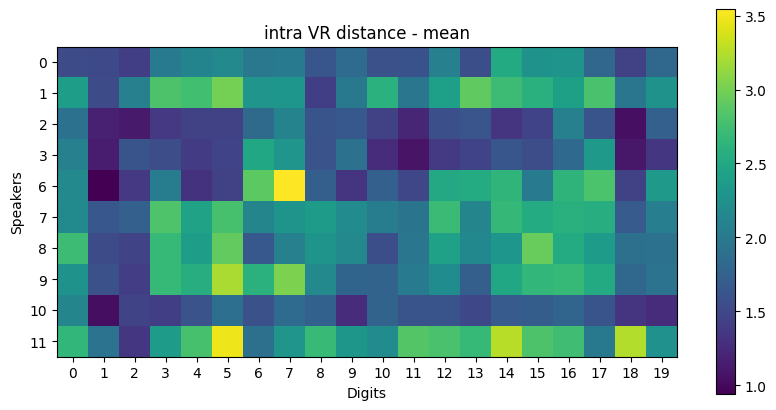

In [13]:
plt.figure(figsize=(10, 5), dpi=100)
plt.title("intra VR distance - mean")
img_mean = plt.imshow(rawHD_analyse_training_data_intra_VR_distance_mean)
plt.xticks(list(range(20)))
plt.yticks(list(range(10)), np.unique(speakers_list))
plt.ylabel("Speakers")
plt.xlabel("Digits")
plt.colorbar(img_mean)
plt.show()

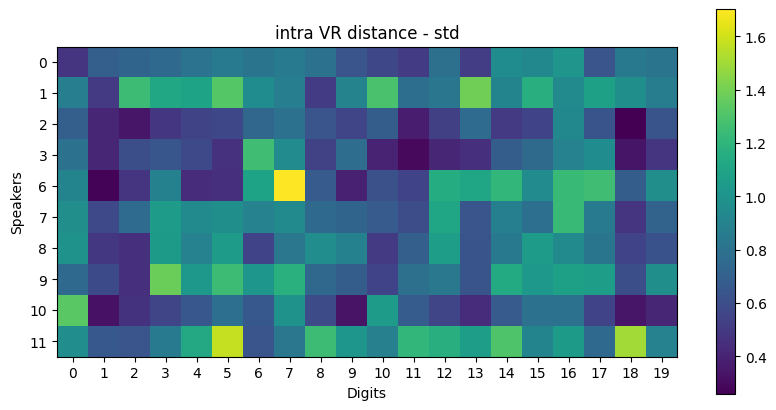

In [14]:
plt.figure(figsize=(10, 5), dpi=100)
plt.title("intra VR distance - std")
img_std = plt.imshow(rawHD_analyse_training_data_intra_VR_distance_std)
plt.xticks(list(range(20)))
plt.yticks(list(range(10)), np.unique(speakers_list))
plt.ylabel("Speakers")
plt.xlabel("Digits")
plt.colorbar(img_std)
plt.show()

In [15]:
rawHD_analyse_training_data_intra_VR_distance_mean.shape

(10, 20)

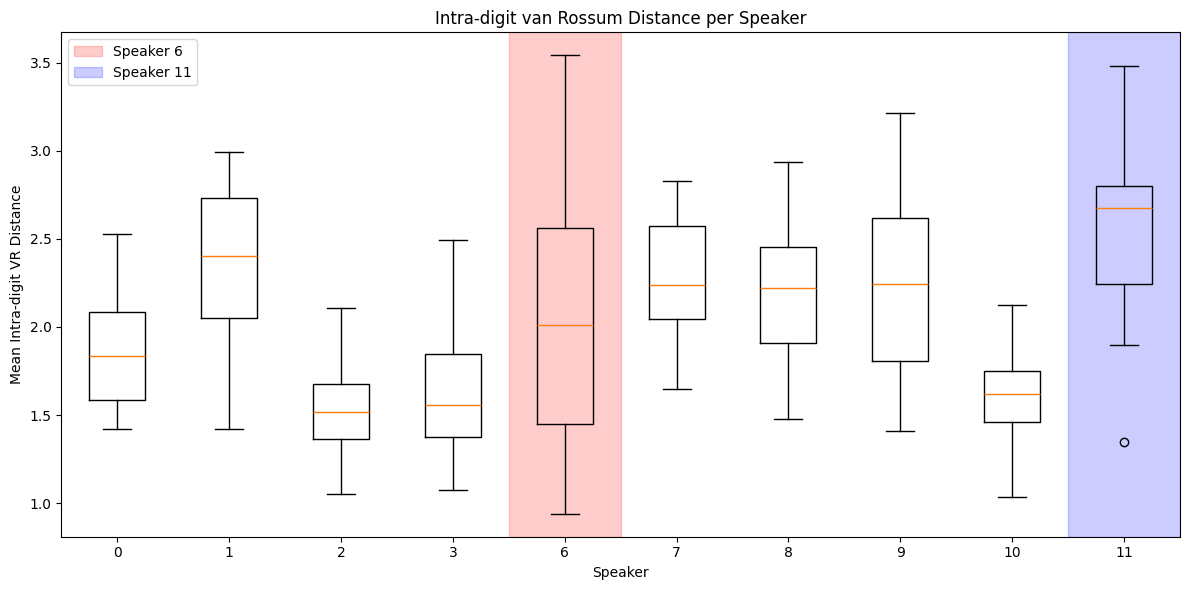

In [40]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6), dpi=100)
plt.title("Intra-digit van Rossum Distance per Speaker")
plt.boxplot(rawHD_analyse_training_data_intra_VR_distance_mean.T)
plt.xlabel("Speaker")
plt.ylabel("Mean Intra-digit VR Distance")
plt.xticks(ticks=np.arange(1, 11), labels=speaker_list_unique)

plt.axvspan(4.5, 5.5, color='red', alpha=0.2, label='Speaker 6')
plt.axvspan(9.5, 10.5, color='blue', alpha=0.2, label='Speaker 11')

plt.legend()
plt.tight_layout()
plt.show()

In [28]:
from scipy.stats import ttest_ind
import numpy as np

means = rawHD_analyse_training_data_intra_VR_distance_mean  # shape: (10, 20)
num_speakers = means.shape[0]

for i in range(num_speakers):
    this_speaker = means[i]
    others = means[np.arange(num_speakers) != i].flatten()

    t_stat, p_val = ttest_ind(this_speaker, others, equal_var=False)  # Welch's t-test
    print(f"Speaker {speaker_list_unique[i]}: p = {p_val:.4e}, Significant = {p_val < 0.05}")

Speaker 0: p = 3.0601e-02, Significant = True
Speaker 1: p = 1.7326e-03, Significant = True
Speaker 2: p = 3.7643e-08, Significant = True
Speaker 3: p = 1.4000e-04, Significant = True
Speaker 6: p = 9.1696e-01, Significant = False
Speaker 7: p = 5.5982e-03, Significant = True
Speaker 8: p = 8.9088e-02, Significant = False
Speaker 9: p = 4.3330e-02, Significant = True
Speaker 10: p = 1.4576e-08, Significant = True
Speaker 11: p = 1.4239e-04, Significant = True


In [29]:
alpha = 0.05
corrected_alpha = alpha / num_speakers  # Bonferroni

for i in range(num_speakers):
    this_speaker = means[i]
    others = means[np.arange(num_speakers) != i].flatten()

    t_stat, p_val = ttest_ind(this_speaker, others, equal_var=False)
    print(f"Speaker {speaker_list_unique[i]}: p = {p_val:.4e}, Significant after Bonferroni = {p_val < corrected_alpha}")

Speaker 0: p = 3.0601e-02, Significant after Bonferroni = False
Speaker 1: p = 1.7326e-03, Significant after Bonferroni = True
Speaker 2: p = 3.7643e-08, Significant after Bonferroni = True
Speaker 3: p = 1.4000e-04, Significant after Bonferroni = True
Speaker 6: p = 9.1696e-01, Significant after Bonferroni = False
Speaker 7: p = 5.5982e-03, Significant after Bonferroni = False
Speaker 8: p = 8.9088e-02, Significant after Bonferroni = False
Speaker 9: p = 4.3330e-02, Significant after Bonferroni = False
Speaker 10: p = 1.4576e-08, Significant after Bonferroni = True
Speaker 11: p = 1.4239e-04, Significant after Bonferroni = True


In [35]:
speaker_list_unique

array([ 0,  1,  2,  3,  6,  7,  8,  9, 10, 11])